In [1]:
import pandas as pd 
df = pd.read_csv("original.csv")
df = df.iloc[: , 1 :len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


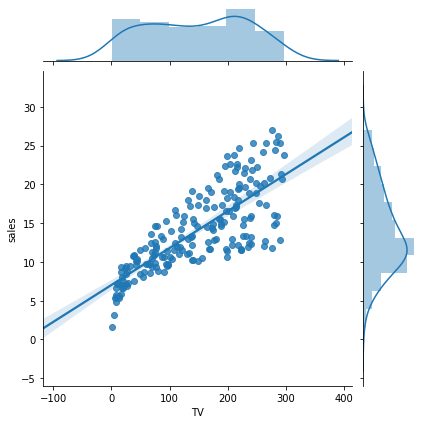

In [4]:
import seaborn as sns
sns.jointplot( x = "TV" ,y = "sales" ,data = df , kind="reg");

In [5]:
from sklearn.linear_model import LinearRegression


In [6]:
x =  df[["TV"]]

In [7]:
y = df[["sales"]]

In [10]:
reg = LinearRegression()

In [11]:
model = reg.fit(x,y)

In [12]:
dir(model
   )

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [14]:
model.intercept_

array([7.03259355])

In [15]:
model.coef_

array([[0.04753664]])

In [17]:
model.score(x ,y)

0.611875050850071

(0, 28.281704763383004)

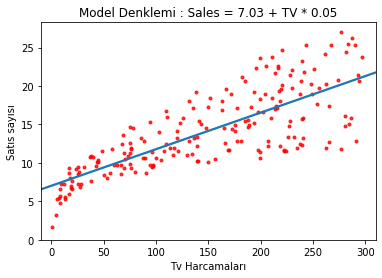

In [22]:
import matplotlib.pyplot as plt 
import seaborn as sns
g = sns.regplot(x = df["TV"] , y = df["sales"]  , ci = None , scatter_kws = {'color' : 'r' , 's': 9})
g.set_title("Model Denklemi : Sales = 7.03 + TV * 0.05")
g.set_ylabel("Satıs sayısı")
g.set_xlabel("Tv Harcamaları")
plt.xlim(-10 ,310)
plt.ylim(bottom = 0)

In [24]:
 model.intercept_ + model.coef_ * 165 # b0 + b1 * tv harcaması

array([[14.87613922]])

In [25]:
model.predict([[165]])

array([[14.87613922]])

In [26]:
yeni_veri = [[5] , [15] ,[20]]

In [27]:
model.predict(yeni_veri)

array([[7.27027675],
       [7.74564316],
       [7.98332636]])

# Artıklar(hatalar)

In [35]:
gercek = y[:10]

In [37]:
tahmin = pd.DataFrame(model.predict(x)[0:10])

In [38]:
hatalar = pd.concat([gercek , tahmin] , axis = 1)

In [39]:
hatalar

,sales,0
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [40]:
hatalar.columns = ["gercek" , "tahmin"]

In [41]:
hatalar

,gercek,tahmin
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [42]:
hatalar["hata oranı "] = hatalar["gercek"] - hatalar["tahmin"]

In [44]:
hatalar

,gercek,tahmin,hata oranı
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [51]:
hatalar["hatalar-karesi"] = hatalar["hata oranı "]**2

In [52]:
hatalar

,gercek,tahmin,hata oranı,hatalar-karesi
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [53]:
hatalar["hatalar-karesi"].mean()

9.290350329638105

In [56]:
import numpy as np
np.mean(hatalar["hatalar-karesi"])

9.290350329638105